<a href="https://colab.research.google.com/github/ajaym416/TreeleafAIchallenge/blob/main/create_eyes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install facenet-pytorch
!pip install ffmpeg-python

     |████████████████████████████████| 1.9MB 9.1MB/s 


In [ ]:
from facenet_pytorch import MTCNN
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import os
from os import mkdir

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/eyes_dataset_final.zip" -d /content/sample_data/dataset


In [ ]:
# Some Android phones and iPhones take images/frames in landscape and
# convert them on the fly according to the exif 'rotate' tag to display the images/frames.
# Thus we need to rotate some vides
import ffmpeg    
def check_rotation(path_video_file):
     # this returns meta-data of the video file in form of a dictionary
     meta_dict = ffmpeg.probe(path_video_file)

     # from the dictionary, meta_dict['streams'][0]['tags']['rotate'] is the key
     # we are looking for
     rotateCode = None
     if int(meta_dict['streams'][0]['tags']['rotate']) == 90:
         rotateCode = cv2.ROTATE_90_CLOCKWISE
     elif int(meta_dict['streams'][0]['tags']['rotate']) == 180:
         rotateCode = cv2.ROTATE_180
     elif int(meta_dict['streams'][0]['tags']['rotate']) == 270:
         rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE

     return rotateCode

def correct_rotation(frame, rotateCode):
  return cv2.rotate(frame, rotateCode) 
  

In [ ]:
os.makedirs("/content/opened_eyes", exist_ok=True)
os.makedirs("/content/closed_eyes" , exist_ok=True)
mtcnn = MTCNN(keep_all=True ,post_process=False ,device='cuda')
eyes_closed=[]
eyes_open=[]
for folder in tqdm(os.listdir("/content/sample_data/dataset/eyes_dataset_final")):
  if (folder == "eyes_open") or (folder=="eyes_closed"):
    print(folder)
    for vid_img_name in os.listdir(os.path.join("/content/sample_data/dataset/eyes_dataset_final",folder)):
      video_path = os.path.join("/content/sample_data/dataset/eyes_dataset_final",folder ,vid_img_name)
      try:
        # check if video requires rotation
        rotateCode = check_rotation(video_path)
      except Exception as e:
        rotateCode=None
        print(e)

      v_cap=cv2.VideoCapture(video_path)
      v_len=int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
      frames=[]
      for i in range(v_len):
        success = v_cap.grab()
        if i%40==0:
          success , frame =v_cap.retrieve()
          if rotateCode is not None:
            frame = correct_rotation(frame, rotateCode)
        else:
          continue

        if not success:
          continue
        frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
      for frame in frames:
        boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)
        eye_lengths=[filter]
        try:
          for box,ld in zip(boxes,landmarks):
              startX,startY,endX,endY=int(box[0]) , int(box[1]),int(box[2]), int(box[3])
              eye_length=int(np.sqrt((startX-endX)*(startY-endY))/7)
              eye_lengths.append(eye_length)
              left_eye_x=int(ld[0][0])
              left_eye_y=int(ld[0][1])
              right_eye_x=int(ld[1][0])
              right_eye_y=int(ld[1][1])
              left_eye= frame[int(left_eye_y-eye_length):int(left_eye_y+eye_length) , int(left_eye_x-eye_length):int(left_eye_x+eye_length)]
              right_eye= frame[int(right_eye_y-eye_length):int(right_eye_y+eye_length) , int(right_eye_x-eye_length):int(right_eye_x+eye_length)]
              if 'closed' in folder.lower():
                eyes_closed.append(left_eye)
                eyes_closed.append(right_eye)
              else:
                eyes_open.append(left_eye)
                eyes_open.append(right_eye)
        except Exception as e:
          print(e)




eyes_closed
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
zip argument #1 must support iteration
zip argument #1 must support iteration
zip argument #1 must support iteration
zip argument #1 must support iteration
zip argument #1 must support iteration
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
zip argument #1 must support iteration
'rotate'
'rotate'
'rotate'
'rotate'
zip argument #1 must support iteration
zip argument #1 must support iteration
'rotate'
'rotate'
'rotate'
eyes_open
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
zip argument #1 must support iteration
'rotate'
zip argument #1 must support iteration
zip argument #1 must support iteration
zip argument #1 must support iteration
zip argument #1 must support iteration
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'
zip argument #1 must support iteration
'rotate'
'rotate'
'rotate'
'rotate'
'rotate'



In [ ]:
len(eyes_closed)

472

In [ ]:
len(eyes_open)

604

In [ ]:
for i in range(len(eyes_closed)):
  print(eyes_closed[i].shape)

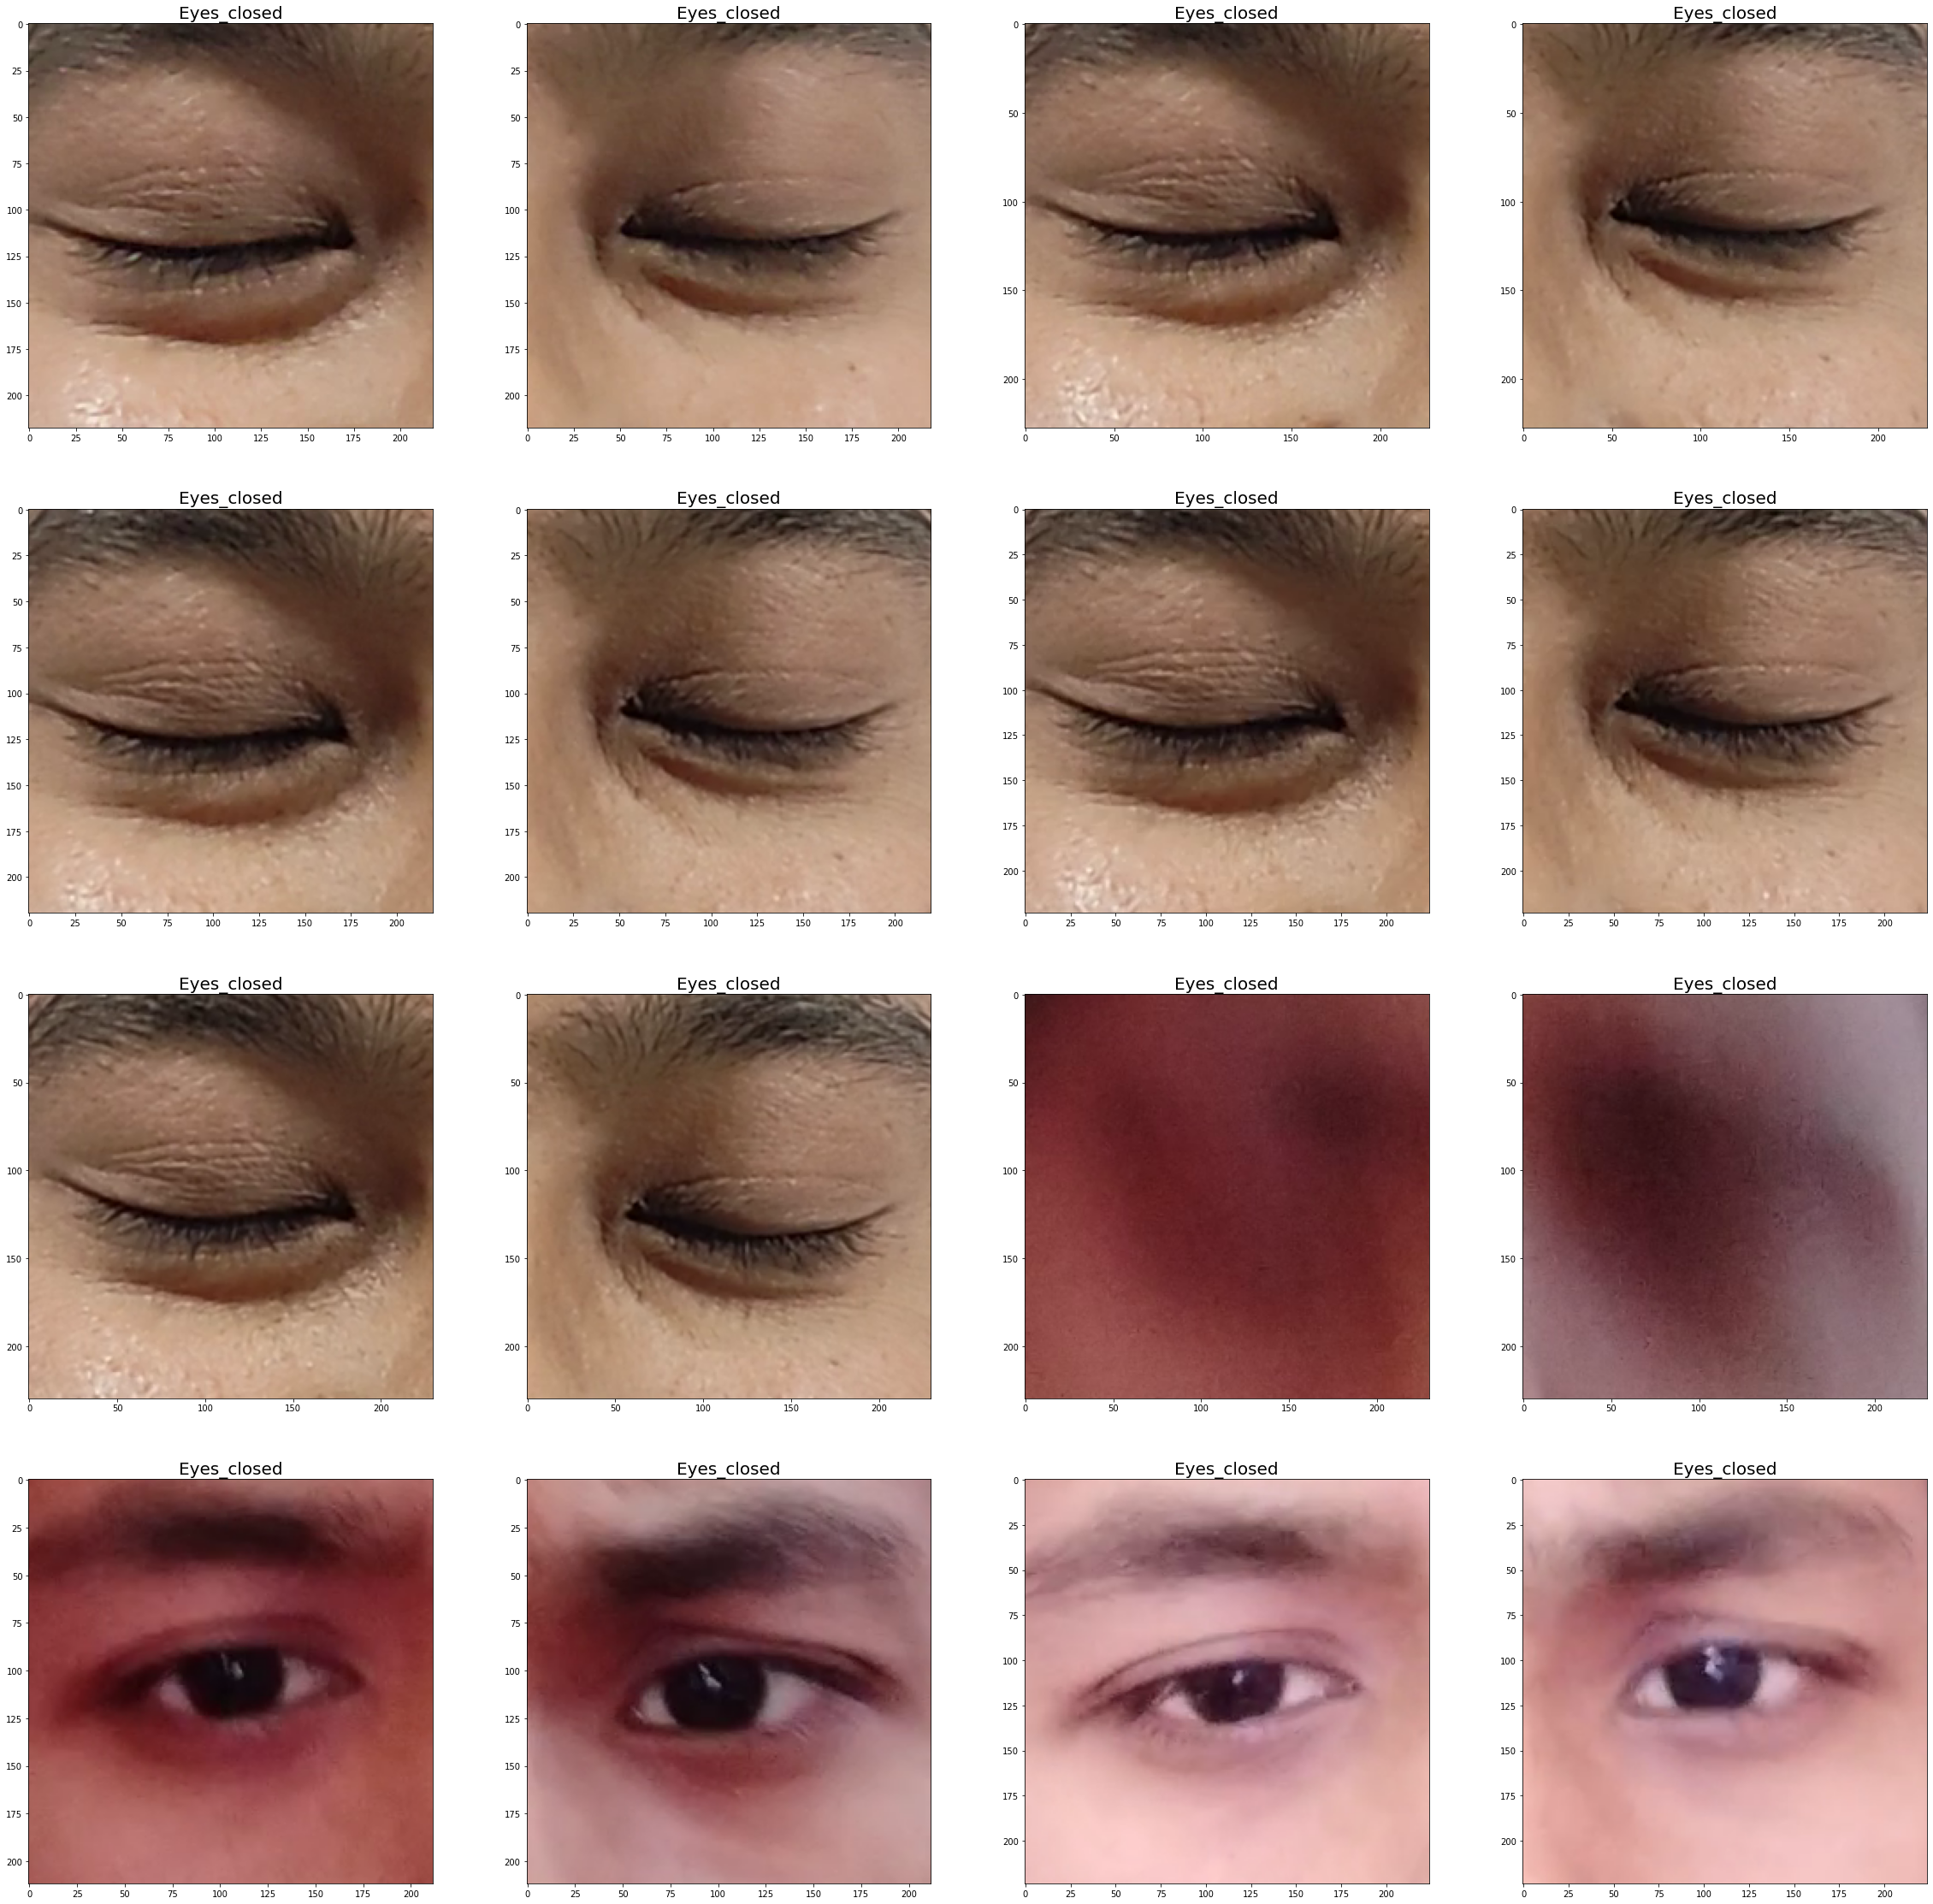

In [ ]:
fig =plt.figure(figsize=(40,40))
ax=[]
for i in range(16):
  ax.append(fig.add_subplot(4,4,i+1))
  ax[-1].imshow(eyes_closed[i])
  ax[-1].set_title("Eyes_closed", fontsize=20)


In [ ]:
type(eyes_closed[1])

numpy.ndarray

In [ ]:
eyes_closed[1].shape

(30, 30, 3)

In [ ]:
  for i in range(len(eyes_closed)):
    try:
      img= Image.fromarray(eyes_closed[i])
      img.save(f"/content/closed_eyes/eyes_closed{i}.jpg")
    except Exception as e:
      print(e)

tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image


In [ ]:
  for i in range(len(eyes_open)):
    try:
      img= Image.fromarray(eyes_open[i])
      img.save(f"/content/opened_eyes/eyes_open{i}.jpg")
    except Exception as e:
      print(e)

tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image
tile cannot extend outside image


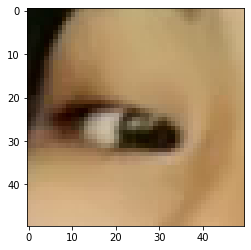

In [ ]:
plt.imshow(eyes_open[0])

In [ ]:
import shutil
shutil.make_archive("eyes_open", 'zip', "/content/opened_eyes")
shutil.make_archive("eyes_closed", 'zip', "/content/closed_eyes")

'/content/eyes_closed.zip'